In [1]:
import sys 
sys.path.append("source")

import pandas
from pss2dataframe import create_dataframe
from PIL import Image
import cv2
import numpy as np
import pandas as pd
import logging
import glob
import os
import matplotlib.pyplot as plt
import pickle as pkl
logger = logging.getLogger()
logger.setLevel(100)

In [2]:
hvs = ["0000010","0000100","0001000"]

In [3]:
nof_dict = {}
for hv in hvs:
    
    path = "save/{}/0000/img/*".format(hv)
    images_path = glob.glob(path)
    images_path.sort()
    
    nof = []
    for ind,im_path in enumerate(images_path):
        image = Image.open(im_path).convert("L")
        image = np.array(image)[:256,:256]
        contours,hierar  = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
        nof.append(len(contours))
        print("{:5}/{:5}:{}".format(ind,len(images_path),len(contours)),end="\r")
    
    nof_dict[hv] = nof

In [4]:
with open("numberofdomains.pkl","wb") as f:
    pkl.dump(nof_dict,f)

In [5]:
with open("numberofdomains.pkl","rb") as f:
    nof_dict = pkl.load(f)

In [31]:
shrink_hvs = {"0000010":nof_dict["0000010"][0:140000:100],"0000100":nof_dict["0000100"][0:14000:10],"0001000":nof_dict["0001000"][0:1400:1]}

In [32]:
datalen = len(shrink_hvs["0000010"])
xlabels = [i for i in range(datalen)]
xlabels_norm = [i/1400 for i in range(datalen)]
xlabels_norm = xlabels_norm[::-1]

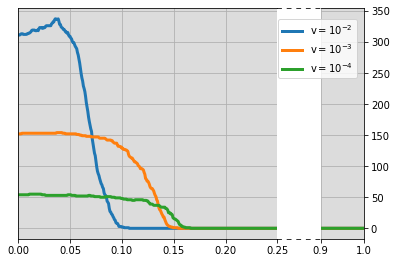

In [80]:
lw = 3
f_sp = 0.6
wh_sp = 0.1
s_sp = 0.8 - wh_sp - f_sp


fig = plt.figure()

ax0 = fig.add_axes((0.1+f_sp, 0.1, wh_sp , 0.8), fc="white",
                   xticks=[], yticks=[])

ax1 = fig.add_axes((0.1, 0.1, f_sp , 0.8), fc="gainsboro",
                   xlim=(0, 0.25), ylabel="")

ax2 = fig.add_axes((0.1+f_sp+wh_sp, 0.1, s_sp, 0.8), fc="gainsboro",
                   xlim=(0.9, 1.0), sharey=ax1)

#fig.suptitle("Jump plot")
fig.text(0.5, 0, "", horizontalalignment="center")

ax1.plot(xlabels_norm,shrink_hvs[hvs[2]],linewidth=lw,label="v$=10^{-2}$")
ax1.plot(xlabels_norm,shrink_hvs[hvs[1]],linewidth=lw,label="v$=10^{-3}$")
ax1.plot(xlabels_norm,shrink_hvs[hvs[0]],linewidth=lw,label="v$=10^{-4}$")

ax1.grid()
#ax1.set_xticks([0,0.1,0.2,0.3,0.4])

ax2.plot(xlabels_norm,shrink_hvs[hvs[2]],linewidth=lw)
ax2.plot(xlabels_norm,shrink_hvs[hvs[1]],linewidth=lw)
ax2.plot(xlabels_norm,shrink_hvs[hvs[0]],linewidth=lw)

ax2.grid()
#ax2.set_xticks(xlabels_norm)
#ax2.set_xticks([0.6,0.7,0.8,0.9,1.0])

ax1.spines["right"].set_visible(False)
ax1.tick_params(left=False, labelleft=False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)

ax2.yaxis.tick_right()
ax2.spines["left"].set_visible(False)
ax2.tick_params(left=False, labelleft=False)

ax0.spines["top"].set_linestyle((0, (5, 7)))
ax0.spines["bottom"].set_linestyle((0, (5, 7)))

fig.legend(loc = (0.7,0.70))
fig.savefig("3-1_b.svg",format='svg', dpi=1000)

(0, 200)

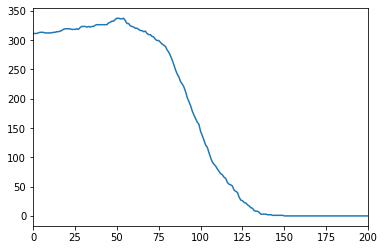

In [60]:
plt.plot(tmp,nof_dict["0001000"][:1400])
plt.xlim(0,200)

In [53]:
tmp = [i for i in range(1400)]
tmp = tmp[::-1]